<h1 style="color:green;">ポートフォリオ理論 第2回</h1>

In [7]:
import pandas as pd 

financial_table = pd.DataFrame({'好景気': [0.5 ,6, -4],
                                '不景気': [0.5 ,-2, 12]
                                },
                index=['確率', '証券1の予想株式投資収益率','証券2の予想株式投資収益率'])

financial_table

,好景気,不景気
確率,0.5,0.5
証券1の予想株式投資収益率,6.0,-2.0
証券2の予想株式投資収益率,-4.0,12.0


<h2>散布図で２つの証券のリスクの相互関係をみる</h2>

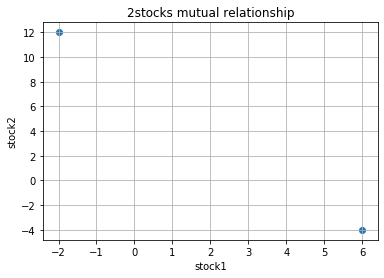

In [8]:
import matplotlib.pyplot as plt

x =  [financial_table.loc['証券1の予想株式投資収益率','好景気'] ,financial_table.loc['証券1の予想株式投資収益率','不景気']]
y =  [financial_table.loc['証券2の予想株式投資収益率','好景気'] ,financial_table.loc['証券2の予想株式投資収益率','不景気']]
plt.scatter(x, y)
#投資収益率のリスクの相互関係
plt.title("2stocks mutual relationship")
plt.xlabel("stock1")
plt.ylabel("stock2")
plt.grid(True)

<h2>数値化し２つの証券のリスクの相互関係をみる(1)</h2>

In [9]:
import math

#証券1のリターン
stock1_return = ( financial_table.loc['確率','好景気']   
                * financial_table.loc['証券1の予想株式投資収益率','好景気'] 
                + financial_table.loc['確率','不景気']  
                * financial_table.loc['証券1の予想株式投資収益率','不景気'] 
                )
print(f"証券1のリターン：{stock1_return}％")


#証券2の期待リターン
stock2_return = ( financial_table.loc['確率','好景気']  
                * financial_table.loc['証券2の予想株式投資収益率','好景気'] 
                + financial_table.loc['確率','不景気'] 
                * financial_table.loc['証券2の予想株式投資収益率','不景気'] 
                )
print(f"証券2のリターン：{stock2_return}％")

証券1のリターン：2.0％
証券2のリターン：4.0％


In [10]:
#証券1と証券2の共分散を求める
covariance = (   financial_table.loc['確率','好景気'] 
               *(financial_table.loc['証券1の予想株式投資収益率','好景気'] - stock1_return)
               *(financial_table.loc['証券2の予想株式投資収益率','好景気'] - stock2_return)
               + financial_table.loc['確率','好景気'] 
               *(financial_table.loc['証券1の予想株式投資収益率','不景気'] - stock1_return)
               *(financial_table.loc['証券2の予想株式投資収益率','不景気'] - stock2_return)
              )
print(f"共分散：{covariance}")

共分散：-32.0


<h2>数値化し２つの証券のリスクの相互関係をみる(2)</h2>

In [11]:
"""
証券1と証券2の共分散 = 証券1と証券2の相関係数 * 証券1の標準偏差 * 証券2の標準偏差

 ⇒ 証券1と証券2の相関係数 = 証券1と証券2の共分散/(証券1の標準偏差 * 証券2の標準偏差)

"""
import math
#証券1のリスク
stock1_risk_var =(  financial_table.loc['確率','好景気']  
                  * (financial_table.loc['証券1の予想株式投資収益率','好景気'] - stock1_return)**2
                  +  financial_table.loc['確率','不景気']  
                  * (financial_table.loc['証券1の予想株式投資収益率','不景気'] - stock1_return)**2
                  )

stock1_risk_stv = math.sqrt(stock1_risk_var)

print(f"2のリスク（分散）：{stock1_risk_var}％^2")
print(f"株式2のリスク（標準偏差）：{stock1_risk_stv}％")


#証券2のリスク
stock2_risk_var =(  financial_table.loc['確率','好景気']  
                  * (financial_table.loc['証券2の予想株式投資収益率','好景気'] - stock2_return)**2
                  +  financial_table.loc['確率','不景気']  
                  * (financial_table.loc['証券2の予想株式投資収益率','不景気'] - stock2_return)**2
                  )

stock2_risk_stv = math.sqrt(stock2_risk_var)

print(f"株式2のリスク（分散）：{stock2_risk_var}％^2")
print(f"株式2のリスク（標準偏差）：{stock2_risk_stv}％")

2のリスク（分散）：16.0％^2
株式2のリスク（標準偏差）：4.0％
株式2のリスク（分散）：64.0％^2
株式2のリスク（標準偏差）：8.0％


In [12]:
"""
証券1と証券2の共分散 = 証券1と証券2の相関係数 * 証券1の標準偏差 * 証券2の標準偏差

 ⇒ 証券1と証券2の相関係数 = 証券1と証券2の共分散/(証券1の標準偏差 * 証券2の標準偏差)

"""
correlation_coefficient = covariance/(stock1_risk_stv * stock2_risk_stv)
print(f"相関係数：{correlation_coefficient}")

相関係数：-1.0


<h2>２つの証券のポートフォリオリターンを求める</h2>

In [13]:
#例として、証券1を50% 証券2を50%の投資比率で割り当ててポートフォリオを組む
portfolio_return = 0.5 * stock1_return + 0.5 * stock2_return 
print(f"ポートフォリオリターン:{portfolio_return}％")

#リターンは下がっているがどんな状況でも安定して収益がある方がよい

ポートフォリオリターン:3.0％


<h2>２つの証券のポートフォリオリスクを求める</h2>

In [14]:
import pandas as pd 

portfolio_matrix = pd.DataFrame({'証券1': [f"証券1の分散：{stock1_risk_var}", f"共分散：{covariance}"],
                                '証券2': [f"共分散：{covariance}", f"証券1の分散：{stock2_risk_var}"]
                                },
                index=['証券1','証券2'])

portfolio_matrix

,証券1,証券2
証券1,証券1の分散：16.0,共分散：-32.0
証券2,共分散：-32.0,証券1の分散：64.0


In [15]:
portfolio_matrix2 = pd.DataFrame({'証券1': [0.5, f"0.5*0.5*証券1の分散", f"0.5*0.5*共分散"],
                                '証券2': [0.5, f"0.5*0.5*共分散", f"0.5*0.5*証券1の分散"]
                                },
                index=['投資比率','証券1(50%)', '証券2(50%)'])

portfolio_matrix2

,証券1,証券2
投資比率,0.5,0.5
証券1(50%),0.5*0.5*証券1の分散,0.5*0.5*共分散
証券2(50%),0.5*0.5*共分散,0.5*0.5*証券1の分散


In [23]:
import pandas as pd 
import math

portfolio_risk_var =(   0.5 * 0.5 * stock1_risk_var
                      + 0.5 * 0.5 * stock2_risk_var
                      + 2   * 0.5 * 0.5 * covariance
                    )

portfolio_risk_stv = math.sqrt(portfolio_risk_var)
print(f"ポートフォリオのリスク（分散）：{portfolio_risk_var}％^2")
print(f"ポートフォリオのリスク（標準偏差）：{portfolio_risk_stv}%")

ポートフォリオのリスク（分散）：4.0％^2
ポートフォリオのリスク（標準偏差）：2.0%


<h2>２つの証券のポートフォリオリターンとリスクを描画する</h2>

In [17]:
def portfolio_return(portfolio_rate1, stock1_return , stock2_return):
    portfolio_rate2 = 1.0 - portfolio_rate1
    return portfolio_rate1 * stock1_return + portfolio_rate2 * stock2_return 


def portfolio_risk_var(portfolio_rate1, stock1_risk_var, stock2_risk_var,covariance):
    portfolio_rate2 = 1.0 - portfolio_rate1
    return  (     portfolio_rate1 * portfolio_rate1 * stock1_risk_var
                 + portfolio_rate2 * portfolio_rate2 * stock2_risk_var
             + 2 * portfolio_rate1 * portfolio_rate2 * covariance  
             )

In [18]:
stock1_return = ( financial_table.loc['確率','好景気']   
                * financial_table.loc['証券1の予想株式投資収益率','好景気'] 
                + financial_table.loc['確率','不景気']  
                * financial_table.loc['証券1の予想株式投資収益率','不景気'] 
                )

stock2_return = ( financial_table.loc['確率','好景気']  
                * financial_table.loc['証券2の予想株式投資収益率','好景気'] 
                + financial_table.loc['確率','不景気'] 
                * financial_table.loc['証券2の予想株式投資収益率','不景気'] 
                )


stock1_risk_var =(  financial_table.loc['確率','好景気']  
                  * (financial_table.loc['証券1の予想株式投資収益率','好景気'] - stock1_return)**2
                  +  financial_table.loc['確率','不景気']  
                  * (financial_table.loc['証券1の予想株式投資収益率','不景気'] - stock1_return)**2
                  )

stock2_risk_var =(  financial_table.loc['確率','好景気']  
                  * (financial_table.loc['証券2の予想株式投資収益率','好景気'] - stock2_return)**2
                  +  financial_table.loc['確率','不景気']  
                  * (financial_table.loc['証券2の予想株式投資収益率','不景気'] - stock2_return)**2
                  )

covariance = (   financial_table.loc['確率','好景気'] 
               *(financial_table.loc['証券1の予想株式投資収益率','好景気'] - stock1_return)
               *(financial_table.loc['証券2の予想株式投資収益率','好景気'] - stock2_return)
                +financial_table.loc['確率','好景気'] 
               *(financial_table.loc['証券1の予想株式投資収益率','不景気'] - stock1_return)
               *(financial_table.loc['証券2の予想株式投資収益率','不景気'] - stock2_return)
              )


In [19]:
portfolio_return_li = [round(portfolio_return(portfolio_rate1 * 0.01, stock1_return , stock2_return) , 2)
                       for portfolio_rate1 in range(100)] 
portfolio_risk_var_li = [round(portfolio_risk_var(portfolio_rate1 * 0.01, stock1_risk_var, stock2_risk_var, covariance) ,2)
                          for portfolio_rate1 in range(100)]

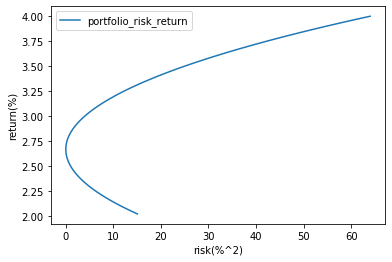

In [20]:
import matplotlib.pyplot as plt

plt.plot(portfolio_risk_var_li, portfolio_return_li, label="portfolio_risk_return")

# 凡例の表示
plt.legend()

#装飾

plt.xlabel('risk(%^2)')
plt.ylabel('return(%)')

# プロット表示(設定の反映)%
plt.show()


<h2>２つの証券のポートフォリオリスクの最小を求める</h2>

In [22]:
"""
ラグランジュアンの未定乗数法により、ポートフォリオリスク最小化は

証券1の組み入れ比率 = (証券2のリスク（分散）- 共分散)
                   / (証券1のリスク（分散）+ 証券2のリスク（分散）- 2 * 共分散)

証券2の組み入れ比率 = 1.0 - 証券1の組み入れ比率
                   
"""

portfolio_rate1 = (stock2_risk_var - covariance)/(stock1_risk_var + stock2_risk_var - 2 * covariance)
portfolio_rate2 = 1.0 - portfolio_rate1
print(f"証券1の投資比率：{round(portfolio_rate1, 2)}")

print(f"証券2の投資比率：{round(portfolio_rate2, 2)}")

証券1の投資比率：0.67
証券2の投資比率：0.33
